# Método no paramétrico de análisis

El método no paramétrico es un método estadístico que se utiliza cuando no se puede especificar la distribución de una población.
Esta técnica se utiliza a menudo en la evaluación de la calidad y la percepción sensorial, que dependen de los sentidos humanos.

## 08-01 Método no paramétrico de análisis

Los métodos estadísticos convencionales suponen que la distribución de la población sigue una distribución específica (métodos paramétricos), mientras que los **métodos no paramétricos** se utilizan cuando **no se puede asumir que la distribución de la población sigue una distribución particular**.

Un buen ejemplo de los tipos de datos a los que se puede aplicar la estadística no paramétrica son los **datos de clasificación** y los datos **nominales**.

Este método no solo es aplicable cuando no se puede suponer una distribución específica, sino también en los casos en los que **se rechaza la normalidad de una distribución**.

Debido a que el método no paramétrico realiza inferencias estadísticas basándose en el número de elementos que cumplen ciertas condiciones, en lugar de en los valores exactos, es **menos susceptible** a la influencia de los valores atípicos.
A esta característica se la denomina **robustez** frente a los valores atípicos.

### Tipos de métodos no paramétricos
#### (1) Inferencia sobre dos poblaciones (para datos no pareados)

Utiliza datos de clasificación para evaluar la posición central y la dispersión de una distribución, e incluye pruebas como la **prueba de Wilcoxon** y la **prueba de Mood**.

* Prueba de Wilcoxon: Para la posición central de la distribución de dos poblaciones:
  * $ H_0 $ : Las posiciones centrales de las distribuciones de dos poblaciones son iguales.
  * Estadístico de prueba específico: La suma de los rangos $ W $ de los datos con el número más pequeño de datos.

* Prueba de Mood: Respecto a la dispersión de las distribuciones de dos poblaciones ($ \sigma_A. \sigma_B $):
  * $ H_0 : \sigma_A = \sigma_B $
  * Estadistico de prueba: $ M = \sum_{i=1}^m \{ R_i - (N+1)/2 \}^2 $
  * $ \qquad R_i $: los datos de rango del grupo con el tamaño de muestra más pequeño
  * $ \qquad N $: el número total de datos

#### (2) Inferencia sobre una población
Es una técnica que infiere sobre la posición central de la distribución de una población, e incluye la **prueba de rangos con signo de Wilcoxon**.
Además, como un método de prueba más simple que no utiliza rangos, existe la **pruba de signos**.

* Prueba de rangos con signo de Wilcoxon: En relación con la posición central de la distribución $ \theta $ de una población:
  * $ H_0 : \theta = \theta_0 $
  * Estadistico de prueba: $ WS^+ = \sum_{i=1}^m R_i $ o $ WS^- = \sum_{j=1}^n S_j $ el menor de los dos valores

* Prueba de signos: Se utiliza solo la información del signo de la diferencia de los datos emparejados para probar la diferencia en la posición central.
  * $ H_0 $: Los posiciones centrales de las características de las distribuciones de X e Y son iguales.
  * Estadístico de prueba: $ n(+) $ o $ n(-) $ el menor de los dos valores

#### (3) Análisis de correlación
Se trata de un análisis de correlación para distribuciones bidimensionales que no requiere asumir una distribución normal bidimensional, a diferencia de los métodos paramétricos.

* **Coeficienete de correlación de rangos de Spearman**: Se utiliza el coeficiente de correlación de muestra de datos de rango Rs (coeficiente de correlación de rangos de Spaarman) para probar si existe una relación entre dos variables.
* **Coeficiente de correlación de rangos de Kendall**: Se utiliza el coeficiente de correlación de rangos de Kendall $ r_k $, que se deriva de la resta del número de pares que no concuerdan del número de pares en los que los signos de ($ X_i - X_j $) y ($ Y_i - Y_j $) si concuerdan , para probar si existe una relación entre dos variables.

#### (4) Análisis de varianza (ANOVA)
También es posible realizar un análisis de varianza utilizando la suma de los cuadrados de los rangos.

* **Prueba de Kruskal-Wallis**: Corresponde al análisis de varianza de un factor (ANOVA de un factor).
* **Prueba de Friedman**: Corresponde al análisis de varianza de dos factores y al diseño de bloques aleatorizados.
* **Coeficiente de concordancia de Kendall**: Se utiliza para determinar si las clasificaciones dadas por los jueces a los sujetos de evaluación tienden a ser consistentes, y equivale al coeficiente de correlación múltiple de los métodos paramétricos.

In [1]:
import os

try:
  os.chdir('../Python/QCKentei')
except:
  pass

path = os.getcwd()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import gspread 
from google.oauth2.service_account import Credentials

## 8.1

ある２種類の樹脂材料A、Bの強度に違いがあるかどうか調べるため、表８．４のデータを得た。開発初期の段階ということもあり、分布の形は左右対称であるが、正規分布と比べて分布の裾が長い分布となっているため、ウィルコクスン検定を行い、評価せよ（単位は省略）。

Para investigar si existen diferencias en la resistencia de dos tipos de materiales de resina, A y B, se recopilaron los datos presentados en la tabla 8.4. Dado que el desarrollo se encuentra en una etapa inicial, la distribución es simétrica pero presenta colas más largas en comparación con una distribución normal. Por lo tanto, realiza la prueba de Wilcoxon y evalúa los resultados (las unidades se omiten).

In [3]:
# 認証情報の設定
SERVICE_ACCOUNT_FILE = "my-project-vscode-452201-249bdb033f8c.json"  # JSONファイルのパス
SCOPES = ["https://www.googleapis.com/auth/spreadsheets"]

credentials = Credentials.from_service_account_file(SERVICE_ACCOUNT_FILE, scopes=SCOPES)
client = gspread.authorize(credentials)

# スプレッドシートを開く（URLまたはスプレッドシートIDを使用）
SPREADSHEET_ID = "1RkO0VL4WR6cbPBfBEjz693Lo4SdUAoSvRHV491ggXTo"

sheet = client.open_by_key(SPREADSHEET_ID).worksheet("Sheet6") # 最初のシートを取得

# データを取得
list_of_lists = sheet.get_all_values()
df = pd.DataFrame(list_of_lists)

df = df.drop(0)
df = df.T

df.columns = df.iloc[0]
df = df.drop(index=0)

df[["A","B"]] = df[["A","B"]].apply(pd.to_numeric)
data = df.copy()

tabla = df.T
tabla.index.name = "resina"
tabla.to_excel("Data_1/tabla_8.4.xlsx")

print('Tabla 8.4')
tabla

Tabla 8.4


,1,2,3,4,5,6,7,8,9
resina,,,,,,,,,
A,60.0,50.0,51.0,42.0,55.0,46.0,49.0,52.0,43.0
B,40.0,76.0,48.0,64.0,59.0,63.0,73.0,56.0,NaN


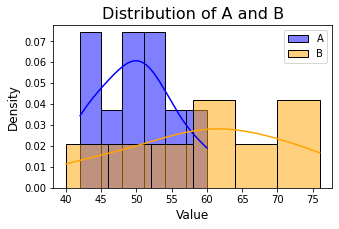

In [4]:
data = data
df = pd.DataFrame(data)

plt.figure(figsize=(5, 3))
sns.histplot(df['A'], kde=True, color='blue', label='A', bins=6, stat="density")
sns.histplot(df['B'], kde=True, color='orange', label='B', bins=6, stat="density")
plt.title('Distribution of A and B', fontsize=16)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.show()

Paso 1: Establecer la hipótesis

* $ H_0 $: No existe diferencia en la resistencia de los materiales de resina A y B.

* $ H_1 $Ñ Existe una diferencia en la resistencia de los materiales de resina A y B.

Paso 2: Ajuste del nivel de significancia
 * $ \alpha = 0.05 $

Paso 3: Determinar el rango:

 * Combinar los datos de los materiales de resina A y B y asignar un rango a los 17 datos totales, comenzando por el valor más pequeño.

Paso 4: Cálculo del estadístico de prueba:

Normalmente, la suma de los rangos del grupo con el menor número de datos se considera el estadístico de prueba.

El estadístico de prueba $ W $ se calcula a partir de la suma de los rangos de los datos del material de resina B, que tiene menos datos, de la siguiente manera:

$ W = 1+17+5+15+12+14+16+11 = 91 $

Paso 5: Decisión y conclusión:

Dado que es una prueba de dos colas, se considera significativa cuando el valor de W es demasiado pequeño o demasiado grande.

$ W = 91 > W_L(0.025) = 51 $

$ W = 91 < W_U(0.025) = 93 $

Con un nivel de significación del 5%, no es significativa.
Es decir, **no se puede afirmar** que haya una diferencia en la resistencia de los materiales de resina A y B.

In [5]:
from scipy.stats import rankdata, mannwhitneyu

data = data
df = pd.DataFrame(data)

combined = pd.concat([df['A'], df['B']])
ranked = combined.rank(method='average')
ranked = ranked.reset_index(drop=True)

df['Rank A'] = ranked[:len(df['A'])].values
df['Rank B'] = ranked[len(df['A']):].values

print("Tabla de datos de rango:")
print(df[['A', 'B', 'Rank A', 'Rank B']].T)

# Data
A = data['A'].to_list()
B = data['B'].to_list()
B = B[:-1]

combined = A + B
ranks = rankdata(combined)  # Calcular los rangos

# 2. Calcular la suma de rangos por grupo
ranks_A = ranks[:len(A)]  # Rango de grupo A
ranks_B = ranks[len(A):]  # Rango de grupo B

T_A = np.sum(ranks_A)  # Suma de rangos del grupo A
T_B = np.sum(ranks_B)  # Suma de rangos del grupo b

# 3. Calcular la estadística de prueba w
W = min(T_A, T_B)

# 4. Prueba de Mann-Whitney U  (Ejectar automáticamente con Scipy)
stat, p_value = mannwhitneyu(A, B, alternative='two-sided')

# Salida de resultados
print("\nSuma de rangos T_A:", T_A)
print("Suma de rangos T_B:", T_B)
print("Estadística de la prueba W:", W)
print("Estadística de la pureba de Mann-Whitney U :", stat)
print("p値:", p_value)

# Tomar una decisión basada en el value p
if p_value < 0.05:
    print("Existe una diferencia estadísticamente significativa entre A y B")
else:
    print("No existe una diferencia estadísticamente significativa entre A y B")


Tabla de datos de rango:
           1     2     3     4     5     6     7     8     9
0                                                           
A       60.0  50.0  51.0  42.0  55.0  46.0  49.0  52.0  43.0
B       40.0  76.0  48.0  64.0  59.0  63.0  73.0  56.0   NaN
Rank A  13.0   7.0   8.0   2.0  10.0   4.0   6.0   9.0   3.0
Rank B   1.0  17.0   5.0  15.0  12.0  14.0  16.0  11.0   NaN

Suma de rangos T_A: 62.0
Suma de rangos T_B: 91.0
Estadística de la prueba W: 62.0
Estadística de la pureba de Mann-Whitney U : 17.0
p値: 0.07445495680789799
No existe una diferencia estadísticamente significativa entre A y B


## 08-02 Calidad sensorial

### 1. Calidad sensorial
El término **calidad sensorial** se refiere a los elementos de calidad que apelan a la sensibilidad humana.

### 2. Método de evaluación sensorial
La evaluación sensorial es un método para evaluar la calidad utilizando los sentidos humanos.
*  Cinco sentidos: Vista, Audición, Olfato, Gusto, Tacto

#### (1) Datos en la evaluación sensorial
La calidad (valores característicos) en la evaluación sensorial se expresa utilizando datos de orden, datos nominales, lenguaje, gráficos, fotografías y muestras de inspección, que se usan en el método no paramétrico.

#### (2) Importancia de los evaluadores (jueces) en la evaluación sensorial
Al utilizar a las personas como instrumentos de medición y expresar los resultados a través del lenguaje, la variabilidad aumenta. Por lo tanto, es crucial establecer muestras de inspección para estabilizar el juicio, contratar evaluadores que se ajusten al propósito de la evaluación considerando el método de evaluación y las propiedades de las muestras, e investigar las diferencias individuales entre los evaluadores.

#### (3) Tipos de evaluación sensorial
* Método de prueba de discriminación: Determinar si hay una diferencia entre dos muestras.
* Método de prueba utilizando escalas y categorías: Se utiliza para evaluar el orden de las diferencias, su magnitud, las categorías correspondientes y la clasificación.
* Método de prueba de clasificación o prueba descriptiva: Se utiliza para capturar cualitativa y cuantitativamente las características de una o más propiedades sensoriales.


In [6]:
notebook_name = 'QCKentei1-8.ipynb'
notebook_name_html = notebook_name.replace(".ipynb",".html")

!jupyter nbconvert --to html {notebook_name}

[NbConvertApp] Converting notebook QCKentei1-8.ipynb to html
[NbConvertApp] Writing 624677 bytes to QCKentei1-8.html
